<h1> ECE4179 - Gradient Decent revisit with Pytorch</h1> <br>
<img src="numpy_linear_regression.gif" width="1200" align="center">
Animation of our "model" at each step when training with gradient descent

<b>With our new knowledge of Pytorch let's create a new implementation of gradient decent!</b>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

<h3> Loading the data </h3>
Lets load some "toy" data that we can use

In [5]:
# you can load your data using this cell
npzfile = np.load("../data/toy_data_two_moon.npz") # toy_data.npz or toy_data_two_circles.npz

#The compressed Numpy file is split up into 4 parts
#Lets convert them to Pytorch Float Tensors
#Train inputs and target outputs
X_train = torch.FloatTensor(npzfile['arr_0'])
y_train = torch.FloatTensor(npzfile['arr_2'])
#Test inputs and target outputs
X_test = torch.FloatTensor(npzfile['arr_1'])
y_test = torch.FloatTensor(npzfile['arr_3'])


<h3> Let's plot our data </h3>

Text(0.5, 1.0, 'Test data')

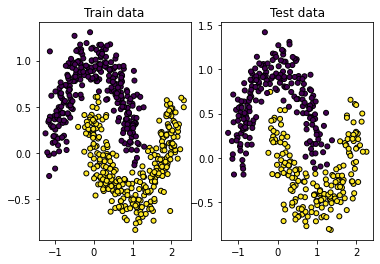

In [6]:
#Lets see what the data looks like
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train[:,0], s=25, edgecolor='k')
plt.title("Train data")
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test[:,0], s=25, edgecolor='k')
plt.title("Test data")

Our data is randomly sampled from an odd looking distribution, the colour of the dots (as represented by y_test[:,0], a one or zero) is what the output of our model SHOULD be (aka the "Ground Truth Data"). Note that each data point is a vector of two values (the "x and y" values), therefore there will only be two parameters in our linear model. <br>
<b>Note we do NOT need to add ones to our data for a bias term as Pytorch's Linear layer has a bias term by default</b>

<h2>Training a model with GD </h2>
In doing so, we need a function to <br>
1- compute the loss with respect to the inputs and the parameters of the model <br>
2- compute the gradient of the model with respect to its parameters $\theta$

We recall the loss of the linear regression as
\begin{align}
L(\theta) = \frac{1}{m} \sum_{i=1}^m \|\theta^\top \boldsymbol{x}_i - y_i\|^2
\end{align}

Now it is easy to see that

\begin{align}
\frac{\partial L}{\partial \theta} = \frac{1}{m} \sum_{i=1}^m 2(\theta^\top \boldsymbol{x}_i - y_i)\boldsymbol{x}_i
\end{align}

<b>Instead of calculating the gradient by hand, we'll just use Pytorch's auto-grad!!</b>

In [8]:
X_train.size()

torch.Size([600, 2])

In [37]:
lr = 0.01

#Define our linear model - 2 inputs, 1 output (bias is included in linear layer)
linear = nn.Linear(2, 1)
#Define our loss function - MSE
loss_function = nn.MSELoss()
#Create our optimizer - lr = 0.1
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

With this, we can perform multiple itteration of GD to train the model

In [38]:
#number of times we itterate over the dataset
max_epoch = 500

loss_log = [] #keep track of the loss values
acc = [] #keep track of the accuracy 
for epoch in range(max_epoch):

    #Perform a training step
    ######Forward Pass######
    y_train_hat = linear(X_train)
    loss = loss_function(y_train_hat, y_train)
    loss_log.append(loss.item())
    optimizer.zero_grad()
    
    #Backwards Pass
    #Calculate the new gradients
    loss.backward()
    
    #Perform an optimization step!
    optimizer.step()
    #Perform a test step
    ######To Do######
    y_test_hat = linear(X_test)
    acc.append(float(sum(y_test_hat.round()==y_test))/float(y_test.shape[0]))
print("Accuracy of linear model(GD): %.2f%% " %(acc[-1]*100))

Accuracy of linear model(GD): 88.25% 


Text(0.5, 1.0, 'Model accuracy per iteration')

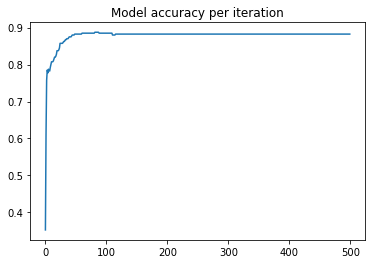

In [39]:
plt.plot(acc)
plt.title("Model accuracy per iteration")

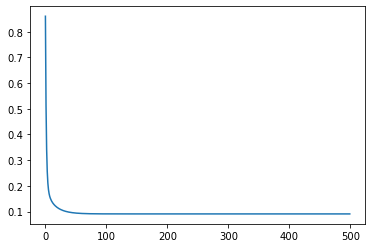

In [40]:
plt.plot(loss_log)

In [41]:
y_test

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      